Задание 1

На основании датасета для каждого покупателя получите:
•	предпочитаемый метод оплаты; 
•	общие траты;
•	количество денег, потраченных на дополнительные услуги и аксессуары. 

Задание 2

На основании датасета получите доход:
•	по каждому методу доставки, 
•	по каждому типу продукта, 
•	по дополнительным услугам за каждый месяц,
•	по дополнительным услугам за каждый квартал. 

Отобразите полученные данные на графике.


Топ-5 покупателей:
            Preferred Payment  Total Spending  Add-on Spending
Customer ID                                                   
16357           Bank Transfer        34563.70           495.19
16863                  PayPal        33035.92           486.17
13813             Credit Card        31830.16           268.64
11476                  PayPal        31077.61           301.59
12276           Bank Transfer        30961.18           329.07
Доход по доставке: {'Expedited': 12437526.21, 'Express': 8685215.620000001, 'Overnight': 8704828.17, 'Same Day': 12432024.82, 'Standard': 21343073.55}
Доход по продуктам: {'Headphones': 4041400.24, 'Laptop': 12296239.97, 'Smartphone': 21516754.69, 'Smartwatch': 14036273.06, 'Tablet': 11712000.41}


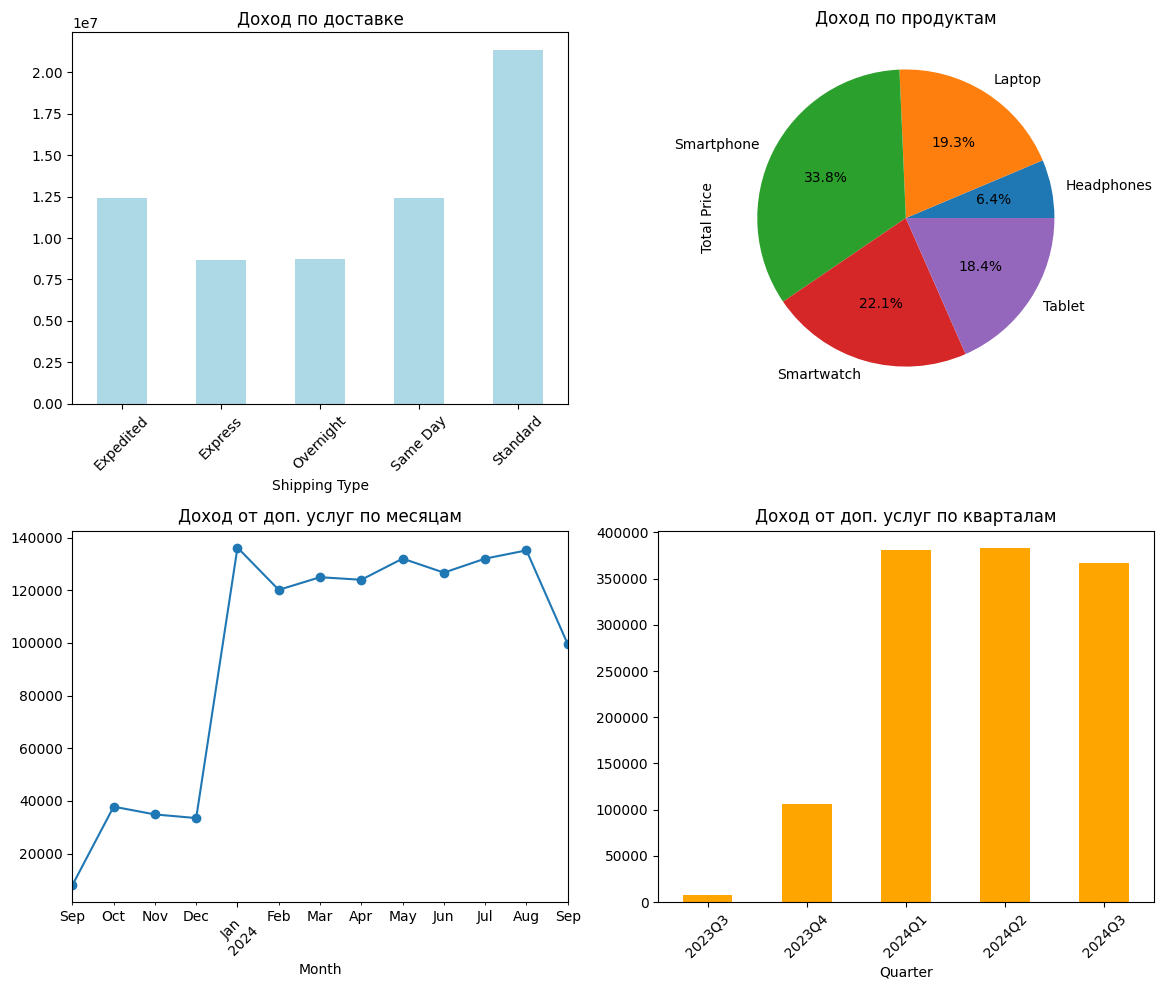


=== СВОДКА ===
Всего покупателей: 12136
Общий доход: $63,602,668
Доход от доп. услуг: $1,244,897


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

payment_counts = df.groupby(['Customer ID', 'Payment Method']).size()
preferred_payment = payment_counts.groupby('Customer ID').idxmax().apply(lambda x: x[1])

customer_stats = df.groupby('Customer ID').agg({
    'Total Price': 'sum',
    'Add-on Total': 'sum'
})

customer_analysis = pd.DataFrame({
    'Preferred Payment': preferred_payment,
    'Total Spending': customer_stats['Total Price'],
    'Add-on Spending': customer_stats['Add-on Total']
})

print("Топ-5 покупателей:")
print(customer_analysis.nlargest(5, 'Total Spending'))

shipping_revenue = df.groupby('Shipping Type')['Total Price'].sum()

product_revenue = df.groupby('Product Type')['Total Price'].sum()

df['Month'] = df['Purchase Date'].dt.to_period('M')
monthly_addon = df.groupby('Month')['Add-on Total'].sum()

df['Quarter'] = df['Purchase Date'].dt.to_period('Q')
quarterly_addon = df.groupby('Quarter')['Add-on Total'].sum()

print("Доход по доставке:", shipping_revenue.to_dict())
print("Доход по продуктам:", product_revenue.to_dict())

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

shipping_revenue.plot(kind='bar', ax=axes[0,0], title='Доход по доставке', color='lightblue')
axes[0,0].tick_params(axis='x', rotation=45)

product_revenue.plot(kind='pie', ax=axes[0,1], title='Доход по продуктам', autopct='%1.1f%%')

monthly_addon.plot(kind='line', ax=axes[1,0], title='Доход от доп. услуг по месяцам', marker='o')
axes[1,0].tick_params(axis='x', rotation=45)

quarterly_addon.plot(kind='bar', ax=axes[1,1], title='Доход от доп. услуг по кварталам', color='orange')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n=== СВОДКА ===")
print(f"Всего покупателей: {len(customer_analysis)}")
print(f"Общий доход: ${df['Total Price'].sum():,.0f}")
print(f"Доход от доп. услуг: ${df['Add-on Total'].sum():,.0f}")